# List 3
Jan Widanka

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

https://www.kaggle.com/datasets/ulrikthygepedersen/online-chess-games

### Description of the features

My data set contains slightly above 20.000 observations. It has 17 features and 3 classes, which are basically the results of the games. Hence we have a win of the white pieces, lose of the white pieces (black wins) and a draw. Features can be described as follows:

- $\textit{game_id}$: identifiaction of each game of chess,
- $\textit{rated}$: True if player is rated and False if not,
- $\textit{turns}$: number of moves in a whole game,
- $\textit{victory_status}$: contains four possibilites of winning the game: resign of the oponent, run out of time, mate and 
- $\textit{winner}$: the result of the game,
- $\textit{time_increment}$: specified time of the game with extra increments in seconds after each move,
- $\textit{white_id}$: the nickname of a player playing white pieces,
- $\textit{white_rating}$: the ranking of a player, who plays white pieces,
- $\textit{black_id}$: the nickname of a player playing black pieces,
- $\textit{black_rating}$: the ranking of a player, who plays black pieces,
- $\textit{moves}$: special chess notation of moves for the whole game,
- $\textit{opening_code}$: code of the opening used by players,
- $\textit{opening_moves}$: the number of moves that an opening contains (book moves),
- $\textit{opening_fullname}$: the full name of the opening,
- $\textit{opening_short\_name}$: the short version of the opening name,
- $\textit{opening_response}$: accepted or declined opening,
- $\textit{opening_variation}$: the variation of the chosen opening.

## Data

In [179]:
data_chess = pd.read_csv("chess_games.csv", delimiter = ',')
data_chess_df = pd.DataFrame(data_chess)

In [180]:
data_chess_df.head(2)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation


### Missing values

In [181]:
data_chess_df.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

### Omitting useless features

In [182]:
data_chess = data_chess_df.drop(['game_id', 'opening_response',  'opening_variation',
                                 'white_id', 'black_id', 'opening_code', 'moves',
                                 'opening_shortname'], axis='columns')

In [215]:
data_chess.head(2)

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_moves,opening_fullname
0,False,13,Out of Time,White,15+2,1500,1191,5,Slav Defense: Exchange Variation
1,True,16,Resign,Black,5+10,1322,1261,4,Nimzowitsch Defense: Kennedy Variation


In [184]:
data_chess.isnull().sum()

rated               0
turns               0
victory_status      0
winner              0
time_increment      0
white_rating        0
black_rating        0
opening_moves       0
opening_fullname    0
dtype: int64

In [185]:
data_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rated             20058 non-null  bool  
 1   turns             20058 non-null  int64 
 2   victory_status    20058 non-null  object
 3   winner            20058 non-null  object
 4   time_increment    20058 non-null  object
 5   white_rating      20058 non-null  int64 
 6   black_rating      20058 non-null  int64 
 7   opening_moves     20058 non-null  int64 
 8   opening_fullname  20058 non-null  object
dtypes: bool(1), int64(4), object(4)
memory usage: 1.2+ MB


## Class distribution

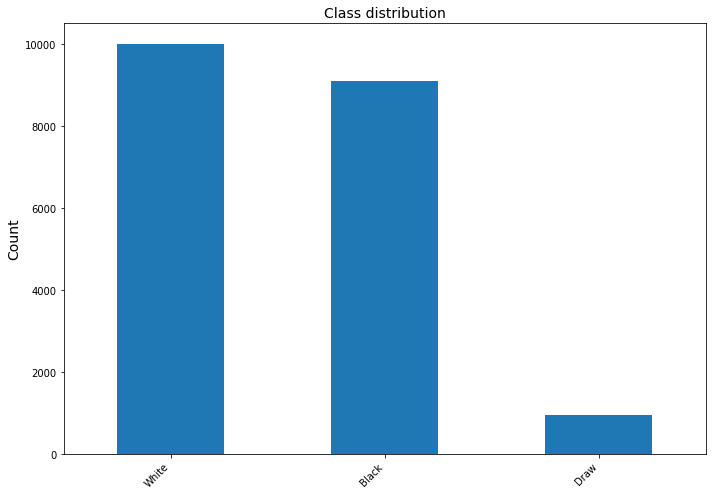

In [240]:
plt.figure(figsize = (10,7))

data_chess['winner'].value_counts().plot.bar()
plt.title('Class distribution', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that we have the class imbalance problem.

## Graphs for qualitative features

### Openings

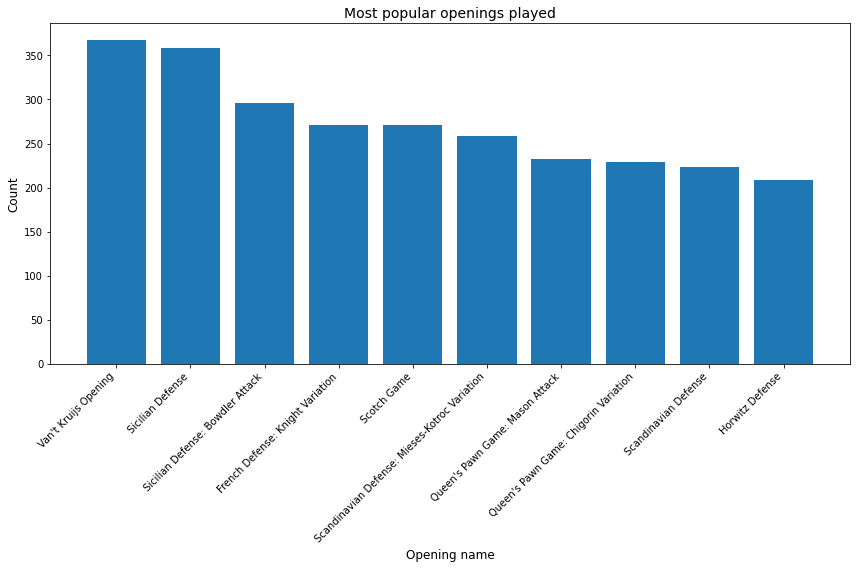

In [208]:
opening_dist = data_chess['opening_fullname'].value_counts()
top_10_openings = opening_dist[:10]


fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_10_openings.index, top_10_openings)
plt.xticks(rotation=45, ha='right')
plt.title("Most popular openings played", fontsize=14)
plt.xlabel("Opening name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

The most played openings in our data set are: $\textit{Van't Kruijs Opening}$ and $\textit{Sicilian Defense}$.

### Victory status

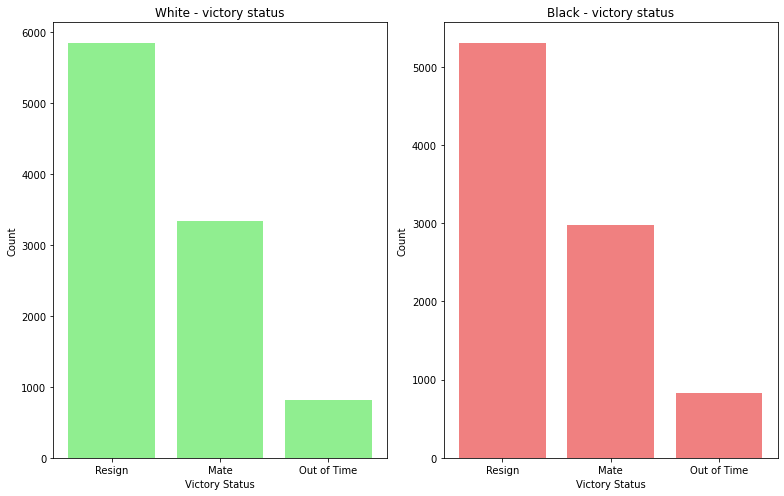

In [226]:
fig, ax = plt.subplots(1, 2, figsize=(11, 7))

# Plot for white 
data_chess_white = data_chess[data_chess['winner'] == 'White']
ax[0].bar(data_chess_white['victory_status'].value_counts().index, data_chess_white['victory_status'].value_counts(), color='lightgreen')
ax[0].set_title("White - victory status")
ax[0].set_xlabel("Victory Status")
ax[0].set_ylabel("Count")

# Plot for black
data_chess_black = data_chess[data_chess['winner'] == 'Black']
ax[1].bar(data_chess_black['victory_status'].value_counts().index, data_chess_black['victory_status'].value_counts(), color='lightcoral')
ax[1].set_title("Black - victory status")
ax[1].set_xlabel("Victory Status")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Graphs for quantitative variables

### Player ratings

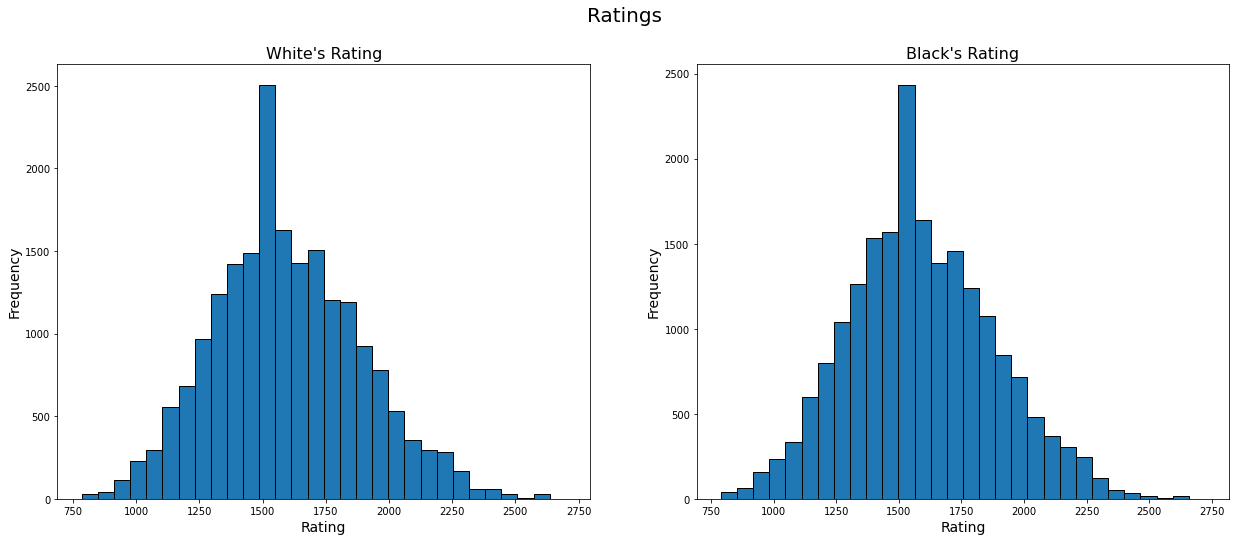

Average Rating of White is: 1596.6318675840064
Average Rating of Black is: 1588.8319872370128


In [238]:
fig, ax = plt.subplots(1, 2, figsize=(21, 8))

ax[0].hist(data_chess['white_rating'], bins=30, edgecolor='black')
ax[0].set_title("White's Rating", fontsize = 16)
ax[1].hist(data_chess['black_rating'], bins=30, edgecolor='black')
ax[1].set_title("Black's Rating", fontsize = 16)

fig.suptitle("Ratings", fontsize=20)
ax[0].set_xlabel("Rating", fontsize = 14)
ax[0].set_ylabel("Frequency", fontsize = 14)
ax[1].set_xlabel("Rating", fontsize = 14)
ax[1].set_ylabel("Frequency", fontsize = 14)
plt.show()

#average rating of black and white
print('Average Rating of White is:', data_chess['white_rating'].mean())
print('Average Rating of Black is:', data_chess['black_rating'].mean())

### Boxplots

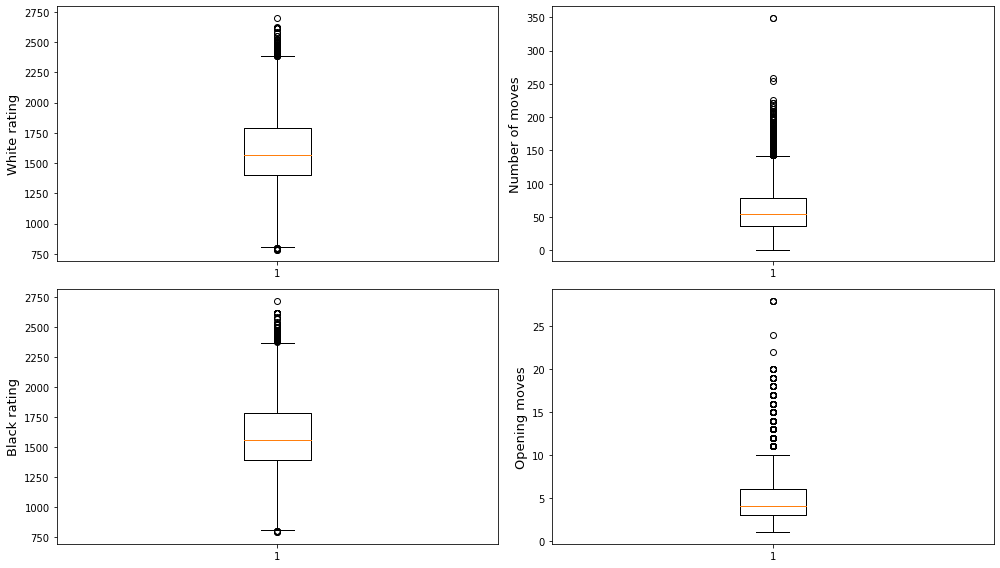

In [239]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0,0].boxplot(data_chess['white_rating'])
axes[0,0].set_ylabel('White rating', fontsize = 13)
axes[0,1].boxplot(data_chess['turns'])
axes[0,1].set_ylabel('Number of moves', fontsize = 13)
axes[1,0].boxplot(data_chess['black_rating'])
axes[1,0].set_ylabel('Black rating', fontsize = 13)
axes[1,1].boxplot(data_chess['opening_moves'])
axes[1,1].set_ylabel('Opening moves', fontsize = 13)

plt.tight_layout()
plt.show()

### Correlation matrix

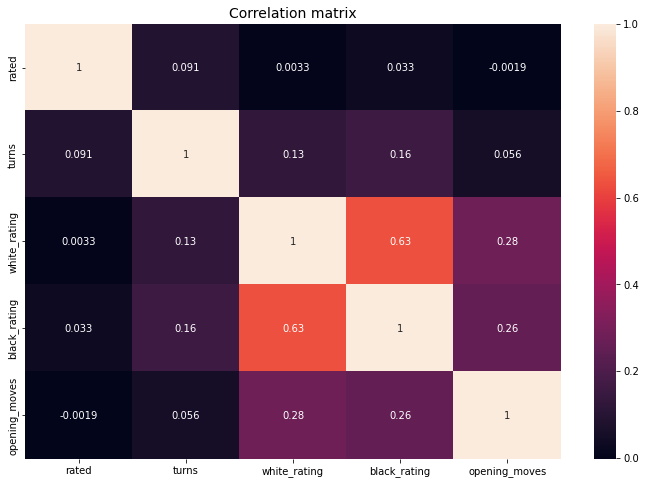

In [241]:
cor_matrix = data_chess.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True)
plt.title('Correlation matrix', fontsize=14)
plt.show()

### Clearing the feature for further analysis

In [242]:
data_chess_cleared = data_chess.drop(['rated'], axis='columns')

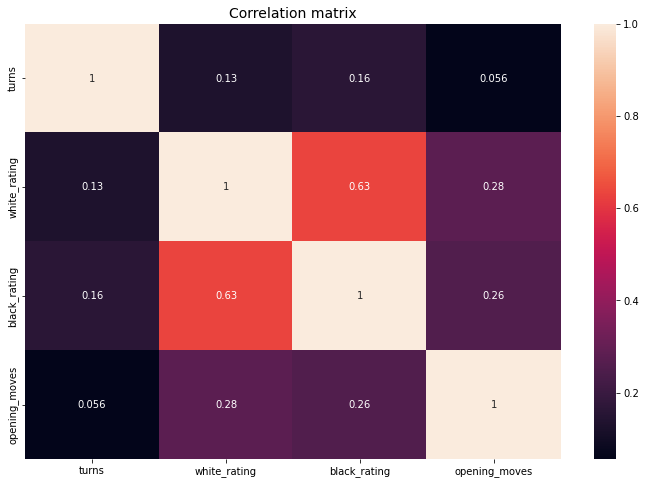

In [243]:
cor_matrix = data_chess_cleared.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True)
plt.title('Correlation matrix', fontsize=14)
plt.show()

### Changing the class labels

In [244]:
data_chess_cleared['winner'] = data_chess_cleared['winner'].map({'White': 1, 'Black': 2, 'Draw': 0})

In [245]:
data_chess_cleared.head()

,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_moves,opening_fullname
0,13,Out of Time,1,15+2,1500,1191,5,Slav Defense: Exchange Variation
1,16,Resign,2,5+10,1322,1261,4,Nimzowitsch Defense: Kennedy Variation
2,61,Mate,1,5+10,1496,1500,3,King's Pawn Game: Leonardis Variation
3,61,Mate,1,20+0,1439,1454,3,Queen's Pawn Game: Zukertort Variation
4,95,Mate,1,30+3,1523,1469,5,Philidor Defense


### Preparing the data to classification

In [246]:
data_chess_cleared['winner'] = data_chess_cleared['winner'].astype('category')
data_chess_cleared['victory_status'] = data_chess_cleared['victory_status'].astype('category')
data_chess_cleared['time_increment'] = data_chess_cleared['time_increment'].astype('category')
data_chess_cleared['opening_fullname'] = data_chess_cleared['opening_fullname'].astype('category')

In [248]:
X = data_chess_cleared.drop('winner', axis=1)
y = data_chess_cleared['winner']

### Numerical and categorical features 

In [ ]:
num_cols = X.select_dtypes(include=['int64']).columns
categoric_cols = X.select_dtypes(include=['category']).columns

In [249]:
categoric_transform = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
])

num_transform = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_cols),
        ('cat', categoric_transform, categoric_cols)
])

### Train and test 

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
len(y_train)

16046

In [257]:
len(y_test)

4012

# Classification

## Random forest

In [126]:
rf_pipeline = Pipeline([
    ('preprocessor' , preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train)

#predict
y_pred_rf_pipeline = rf_pipeline.predict(X_test)

#conf_matrix
conf_matrix_rf_pipeline = confusion_matrix(y_test, y_pred_rf_pipeline)

#accuracy
accuracy_rf_pipeline = accuracy_score(y_pred_rf_pipeline, y_test)
print(f"Accuracy: {accuracy_rf_pipeline}")

Accuracy: 0.6874376869391825


### Classification report

In [174]:
report_rf_bt = classification_report(y_test, y_pred_rf_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_rf_bt).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.673713  0.731537  0.701435   2004.0
2              0.671299  0.611784  0.640161   1816.0
macro avg      0.781671  0.762010  0.770702   4012.0
weighted avg   0.688235  0.687438  0.686577   4012.0


### Confusion matrix

In [134]:
class_labels = ['Draw', 'White', 'Black']

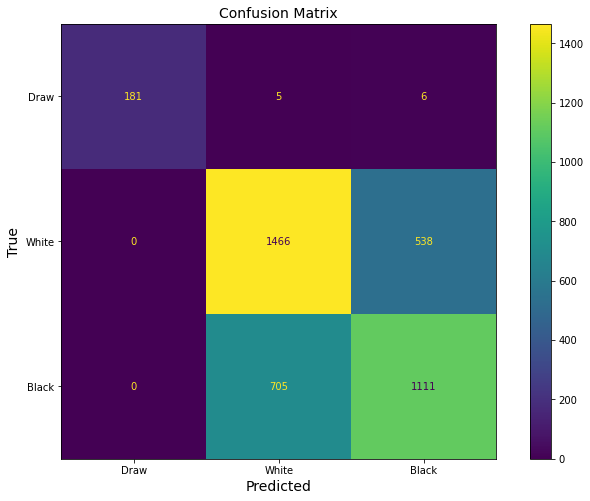

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()

### Tuning

In [130]:
rf_parameter_grid =  {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__n_estimators': [50, 100, 200]
}

rf_random_search = GridSearchCV(rf_pipeline, rf_parameter_grid, cv=5, n_jobs=-1)
tuned_rf_pipe = rf_random_search.fit(X_train, y_train)

best_params_rf_pipe = rf_random_search.best_params_
print(f'Best Hyperparameters: {best_params_rf_pipe}')

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}


In [131]:
y_pred_tuned_pipe_rf = tuned_rf_pipe.predict(X_test)

conf_matrix_tuned_pipe_rf = confusion_matrix(y_pred_tuned_pipe_rf, y_test)

accuracy_tuned_rf_pipe = accuracy_score(y_pred_tuned_pipe_rf, y_test)
print(f"Accuracy: {accuracy_tuned_rf_pipe}")

Accuracy: 0.6929212362911267


### Classification report

In [173]:
report_rf = classification_report(y_test, y_pred_tuned_pipe_rf, output_dict=True)

df_classification_report = pd.DataFrame(report_rf).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.676216  0.742016  0.707590   2004.0
2              0.681373  0.612335  0.645012   1816.0
macro avg      0.785863  0.765686  0.774370   4012.0
weighted avg   0.694045  0.692921  0.691847   4012.0


### Confusion matrix

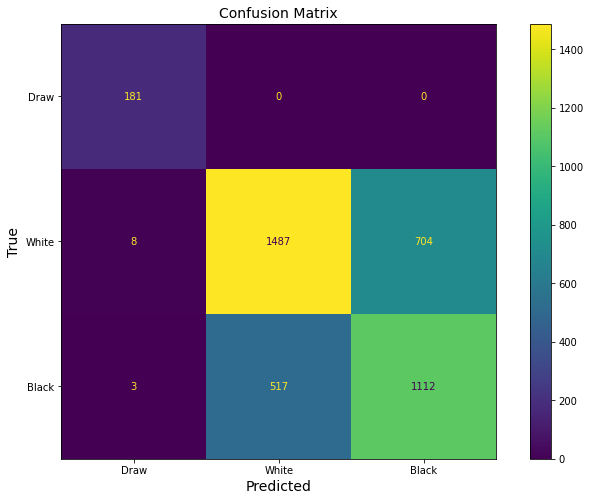

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_rf,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

## Classification tree

In [77]:
class_tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

class_tree_pipe.fit(X_train, y_train)

#predict
y_pred_ctree_pipeline = class_tree_pipe.predict(X_test)

#conf_matrix
conf_matrix_ctree_pipeline = confusion_matrix(y_test, y_pred_ctree_pipeline)

#accuracy
accuracy_ctree_pipeline = accuracy_score(y_pred_ctree_pipeline, y_test)
print(f"Accuracy: {accuracy_ctree_pipeline}")

Accuracy: 0.6560319042871385


### Classification report

In [172]:
report_tree_bt = classification_report(y_test, y_pred_ctree_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_tree_bt).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.983696  0.942708  0.962766    192.0
1              0.654183  0.671158  0.662562   2004.0
2              0.624153  0.609031  0.616499   1816.0
macro avg      0.754011  0.740966  0.747276   4012.0
weighted avg   0.656360  0.656032  0.656079   4012.0


### Confusion matrix

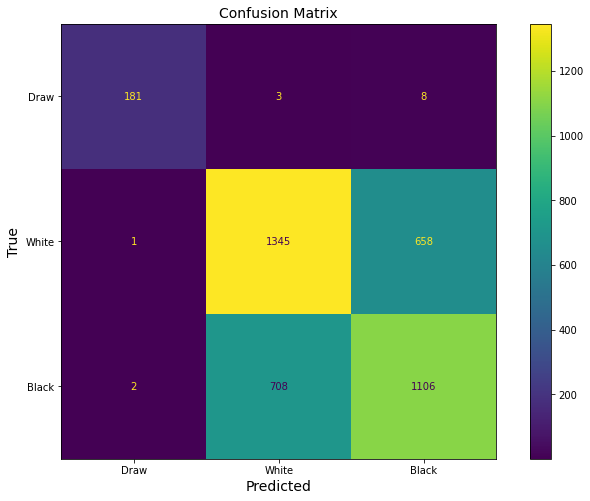

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ctree_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [80]:
tree_parameter_grid =  {
    'classifier__criterion': ['gini', 'entropy'], 
    'classifier__min_samples_split': [1, 2, 3, 5],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__max_depth': [None, 1, 5, 10, 20]
}

class_tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

tree_random_search = GridSearchCV(class_tree_pipe, tree_parameter_grid, cv=5, n_jobs=-1)
tuned_class_tree = tree_random_search.fit(X_train, y_train)

best_params_tree_pipe = tree_random_search.best_params_
print(f'Best Hyperparameters: {best_params_tree_pipe}')

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


In [81]:
y_pred_tuned_pipe_tree = tuned_class_tree.predict(X_test)

conf_matrix_tuned_pipe_tree = confusion_matrix(y_pred_tuned_pipe_tree, y_test)

accuracy_tuned_class_tree_pipe = accuracy_score(y_pred_tuned_pipe_tree, y_test)
print(f"Accuracy: {accuracy_tuned_class_tree_pipe}")

Accuracy: 0.6632602193419741


### Classification report

In [169]:
report_tree = classification_report(y_test, y_pred_tuned_pipe_tree, output_dict=True)

df_classification_report = pd.DataFrame(report_tree).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.983696  0.942708  0.962766    192.0
1              0.659699  0.677146  0.668308   2004.0
2              0.634105  0.618392  0.626150   1816.0
macro avg      0.759166  0.746082  0.752408   4012.0
weighted avg   0.663619  0.663260  0.663317   4012.0


### Confusion matrix

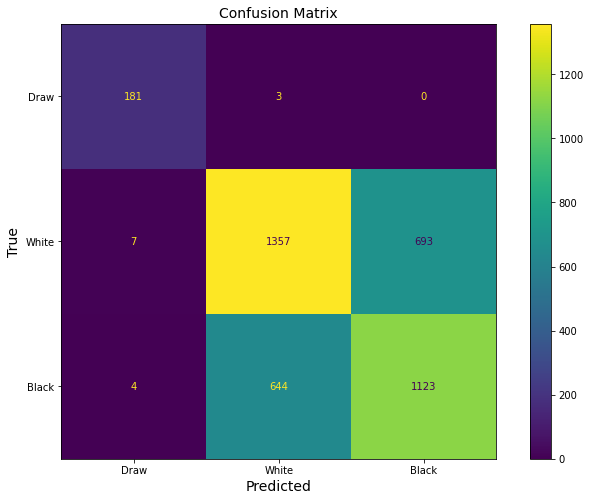

In [139]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_tree,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Visualization

In [266]:
best_tree = tuned_class_tree.best_estimator_.named_steps['classifier']

#transformed to obtain result
X_train_transformed = preprocessor.transform(X_train)

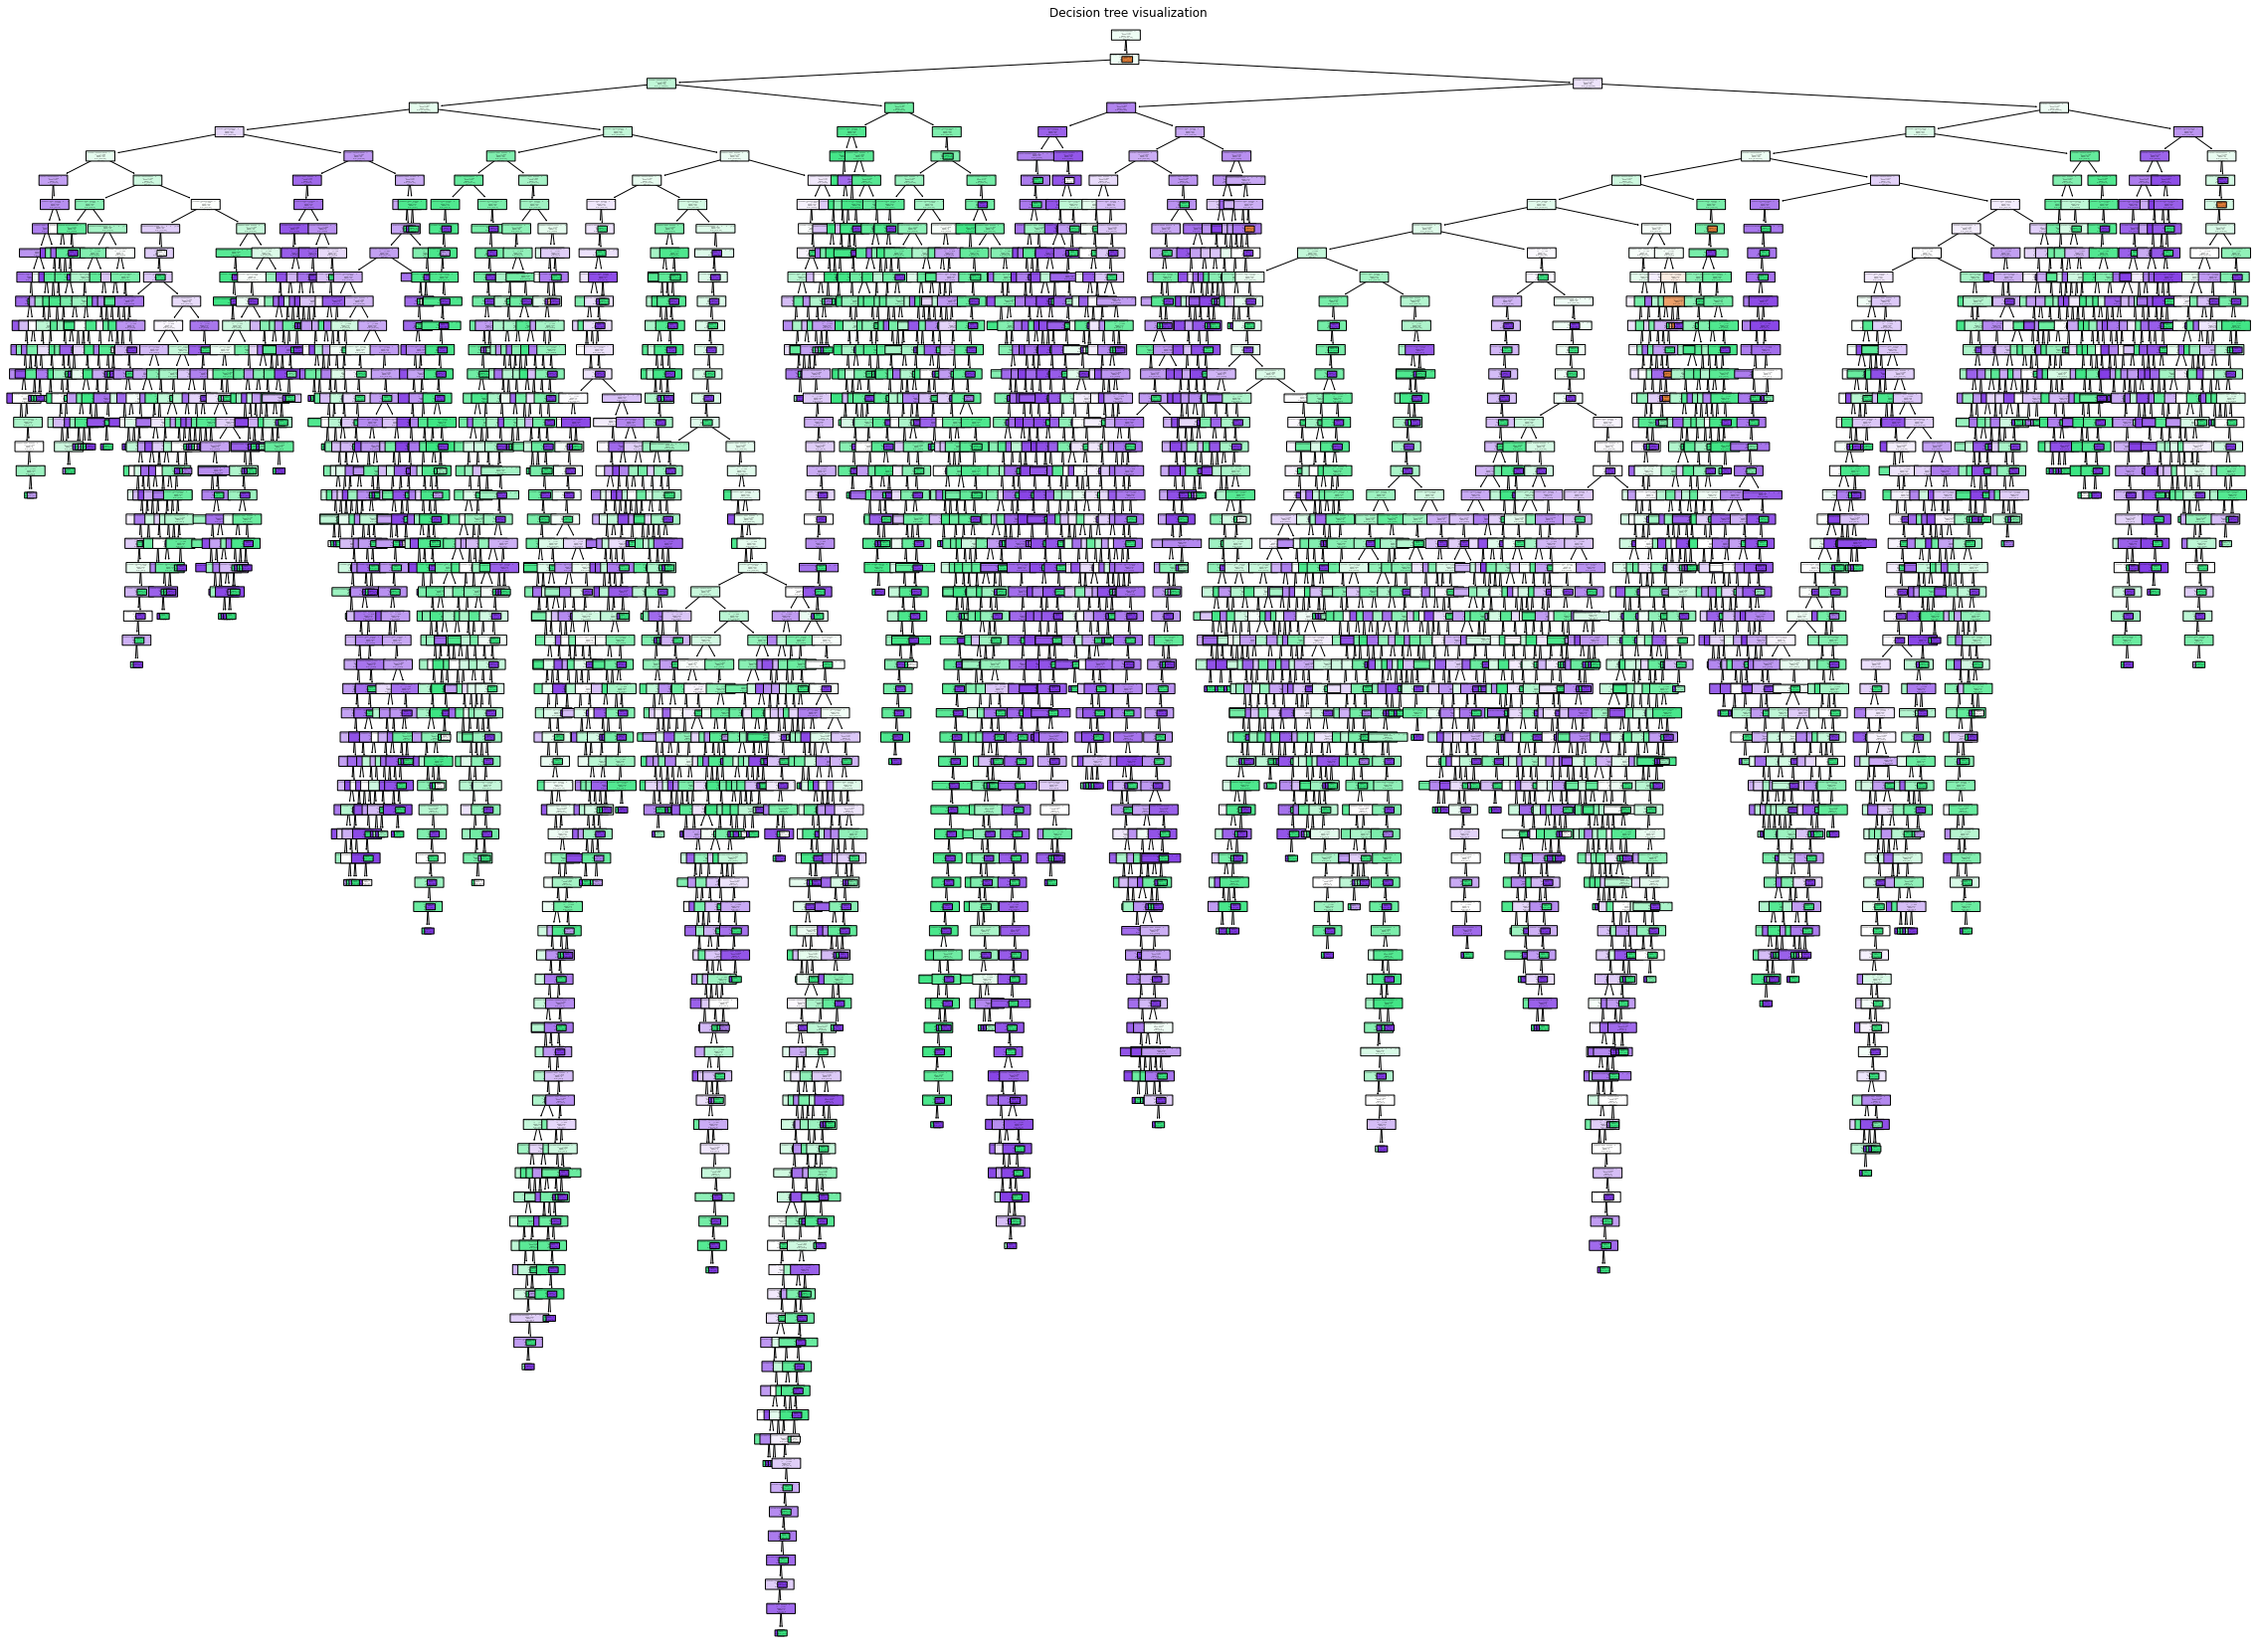

In [261]:
plt.figure(figsize=(40, 30))
plot_tree(best_tree, feature_names=X_train_transformed, class_names=True, filled=True, rounded=True)
plt.title('Decision tree visualization')
plt.show()

## Logistic regression

In [63]:
log_regression_pipe = Pipeline([
    ('preprocessor' , preprocessor),
    ('classifier', LogisticRegression())
])

log_regression_pipe.fit(X_train, y_train)

#predict
y_pred_lr_pipeline = log_regression_pipe.predict(X_test)

#conf_matrix
conf_matrix_lr_pipeline = confusion_matrix(y_test, y_pred_lr_pipeline)

#accuracy
accuracy_lr_pipeline = accuracy_score(y_pred_lr_pipeline, y_test)
print(f"Accuracy: {accuracy_lr_pipeline}")

Accuracy: 0.6667497507477568


### Classification report

In [76]:
report_lr = classification_report(y_test, y_pred_lr_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_lr).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.947917  0.973262    192.0
1              0.659413  0.695609  0.677028   2004.0
2              0.640443  0.605176  0.622310   1816.0
macro avg      0.766619  0.749567  0.757533   4012.0
weighted avg   0.667126  0.666750  0.666437   4012.0


### Confusion matrix

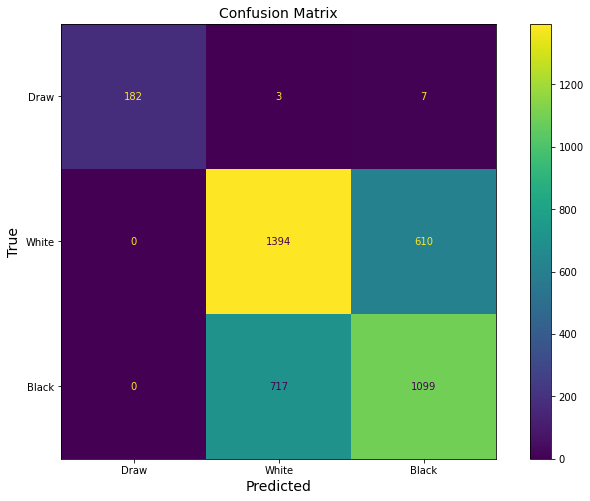

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [66]:
lr_parameter_grid =  {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.1, 1, 3, 5, 7]
}

lr_grid_search = GridSearchCV(log_regression_pipe, lr_parameter_grid, cv=5, n_jobs=-1)
tuned_lr_pipe = lr_grid_search.fit(X_train, y_train)

best_params_lr_pipe = lr_grid_search.best_params_
print(f'Best Hyperparameters: {best_params_lr_pipe}')

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


In [67]:
y_pred_tuned_pipe_lr = tuned_lr_pipe.predict(X_test)

conf_matrix_tuned_pipe_lr = confusion_matrix(y_pred_tuned_pipe_lr, y_test)

accuracy_tuned_lr_pipe = accuracy_score(y_pred_tuned_pipe_lr, y_test)
print(f"Accuracy: {accuracy_tuned_lr_pipe}")

Accuracy: 0.6702392821535393


### Classification report

In [75]:
report = classification_report(y_test, y_pred_tuned_pipe_lr, output_dict=True)

df_classification_report = pd.DataFrame(report).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.660167  0.709581  0.683983   2004.0
2              0.647585  0.598018  0.621815   1816.0
macro avg      0.769251  0.750102  0.758769   4012.0
weighted avg   0.670735  0.670239  0.669555   4012.0


### Confusion matrix

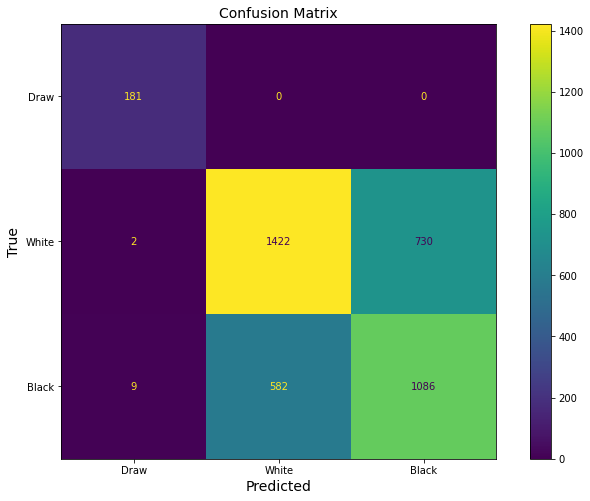

In [141]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_lr,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

## k-NN

In [55]:
knn_pipe = Pipeline([
    ('preprocessor' , preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_pipe.fit(X_train, y_train)

#predict
y_pred_knn_pipeline = knn_pipe.predict(X_test)

#conf_matrix
conf_matrix_knn_pipeline = confusion_matrix(y_test, y_pred_knn_pipeline)

#accuracy
accuracy_knn_pipeline = accuracy_score(y_pred_knn_pipeline, y_test)
print(f"Accuracy: {accuracy_knn_pipeline}")

Accuracy: 0.6211365902293121


### Classification report

In [168]:
report_knn = classification_report(y_test, y_pred_knn_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_knn).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.965714  0.880208  0.920981    192.0
1              0.620357  0.641717  0.630856   2004.0
2              0.587868  0.571035  0.579330   1816.0
macro avg      0.724647  0.697653  0.710389   4012.0
weighted avg   0.622179  0.621137  0.621417   4012.0


### Confusion matrix

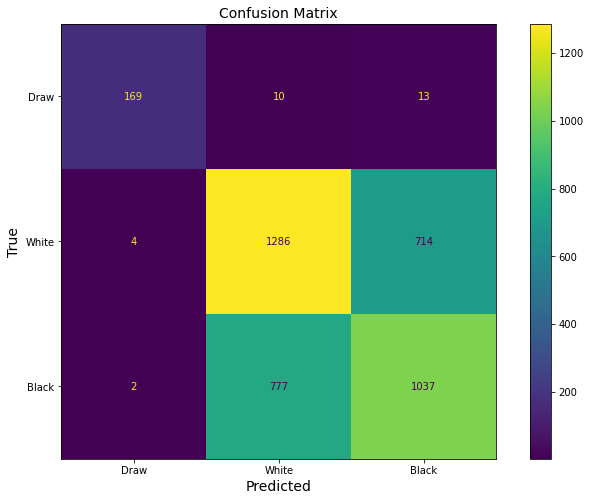

In [142]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [58]:
param_grid_knn = {'classifier__n_neighbors': [i for i in range (1, 20)],
                 'classifier__metric': ['manhattan', 'minkowski']}

knn_grid_search = GridSearchCV(knn_pipe, param_grid_knn, cv=5, n_jobs=-1)
tuned_knn_pipe = knn_grid_search.fit(X_train, y_train)

best_params_knn_pipe = tuned_knn_pipe.best_params_
print(f'Best Hyperparameters: {best_params_knn_pipe}')

Best Hyperparameters: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 17}


In [59]:
y_pred_tuned_pipe_knn = tuned_knn_pipe.predict(X_test)

conf_matrix_tuned_pipe_knn = confusion_matrix(y_pred_tuned_pipe_knn, y_test)

accuracy_tuned_knn_pipe = accuracy_score(y_pred_tuned_pipe_knn, y_test)
print(f"Accuracy: {accuracy_tuned_knn_pipe}")

Accuracy: 0.6301096709870389


### Classification report

In [167]:
report_knn_tuned = classification_report(y_test, y_pred_tuned_pipe_knn, output_dict=True)

df_classification_report = pd.DataFrame(report_knn_tuned).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.880208  0.936288    192.0
1              0.623323  0.672156  0.646819   2004.0
2              0.601665  0.557269  0.578616   1816.0
macro avg      0.741662  0.703211  0.720574   4012.0
weighted avg   0.631546  0.630110  0.629800   4012.0


### Confusion matrix

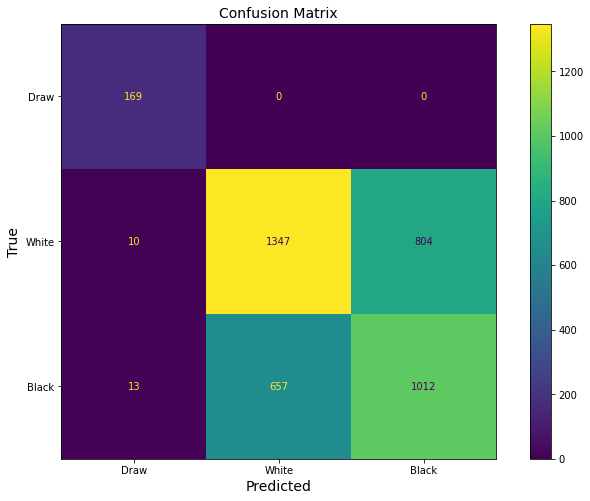

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_knn,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Visualization

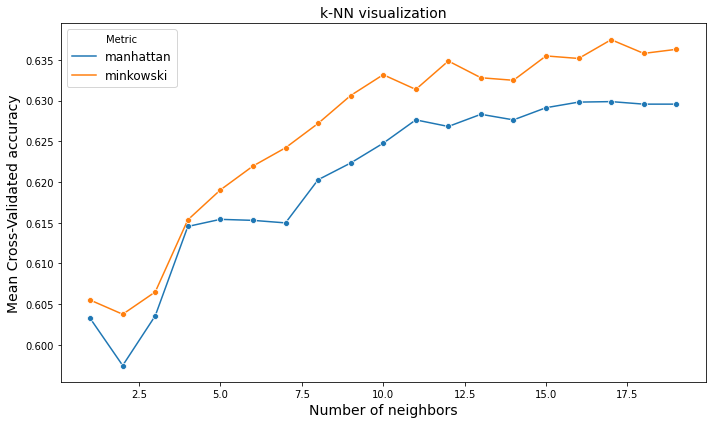

In [62]:
results = pd.DataFrame(knn_grid_search.cv_results_)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_classifier__n_neighbors', y='mean_test_score', hue='param_classifier__metric', data=results, marker='o')
plt.title('k-NN visualization', fontsize=14)
plt.xlabel('Number of neighbors', fontsize=14)
plt.ylabel('Mean Cross-Validated accuracy', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()

## SVM

In [146]:
svm_pipe = Pipeline([
    ('preprocessor' , preprocessor),
    ('classifier', SVC())
])

svm_pipe.fit(X_train, y_train)

#predict
y_pred_svm_pipeline = svm_pipe.predict(X_test)

#conf_matrix
conf_matrix_svm_pipeline = confusion_matrix(y_test, y_pred_svm_pipeline)

#accuracy
accuracy_svm_pipeline = accuracy_score(y_pred_svm_pipeline, y_test)
print(f"Accuracy: {accuracy_svm_pipeline}")

Accuracy: 0.6704885343968096


### Classification report

In [166]:
report_svm = classification_report(y_test, y_pred_svm_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_svm).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.657835  0.718563  0.686859   2004.0
2              0.651035  0.588656  0.618276   1816.0
macro avg      0.769623  0.749976  0.758548   4012.0
weighted avg   0.671132  0.670489  0.669390   4012.0


### Confusion matrix

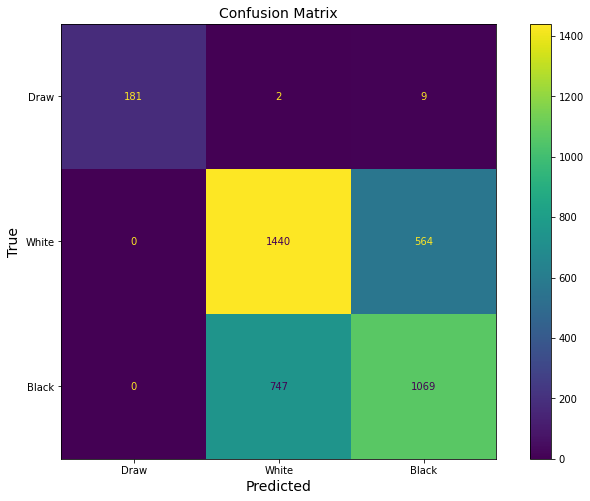

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [150]:
param_grid_svm = {
    'classifier__kernel' : ['rbf', 'linear'],
    'classifier__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm_pipe, param_grid_svm, cv=5, n_jobs=-1)
tuned_svm_pipe = svm_grid_search.fit(X_train, y_train)

best_params_svm_pipe = tuned_svm_pipe.best_params_
print(f'Best Hyperparameters: {best_params_svm_pipe}')

Best Hyperparameters: {'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [151]:
y_pred_tuned_pipe_svm = tuned_svm_pipe.predict(X_test)

conf_matrix_tuned_pipe_svm = confusion_matrix(y_pred_tuned_pipe_svm, y_test)

accuracy_tuned_svm_pipe = accuracy_score(y_pred_tuned_pipe_svm, y_test)
print(f"Accuracy: {accuracy_tuned_svm_pipe}")

Accuracy: 0.6704885343968096


### Classification report

In [152]:
report_svm_tuned = classification_report(y_test, y_pred_tuned_pipe_svm, output_dict=True)

df_classification_report = pd.DataFrame(report_svm_tuned).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.657835  0.718563  0.686859   2004.0
2              0.651035  0.588656  0.618276   1816.0
macro avg      0.769623  0.749976  0.758548   4012.0
weighted avg   0.671132  0.670489  0.669390   4012.0


### Confusion matrix

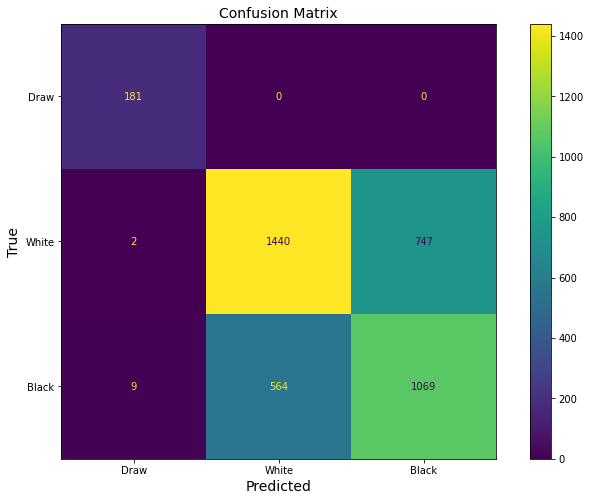

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_svm,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

## Neural network

In [155]:
neur_pipe = Pipeline([
    ('preprocessor' , preprocessor),
    ('classifier', MLPClassifier())
])

neur_pipe.fit(X_train, y_train)

#predict
y_pred_neur_pipeline = neur_pipe.predict(X_test)

#conf_matrix
conf_matrix_neur_pipeline = confusion_matrix(y_test, y_pred_neur_pipeline)

#accuracy
accuracy_neur_pipeline = accuracy_score(y_pred_neur_pipeline, y_test)
print(f"Accuracy: {accuracy_neur_pipeline}")

Accuracy: 0.6488035892323031


### Classification report

In [156]:
report_neur = classification_report(y_test, y_pred_neur_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_neur).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.973545  0.958333  0.965879    192.0
1              0.653925  0.640220  0.646999   2004.0
2              0.610425  0.625551  0.617895   1816.0
macro avg      0.745965  0.741368  0.743591   4012.0
weighted avg   0.649530  0.648804  0.649086   4012.0


### Confusion matrix

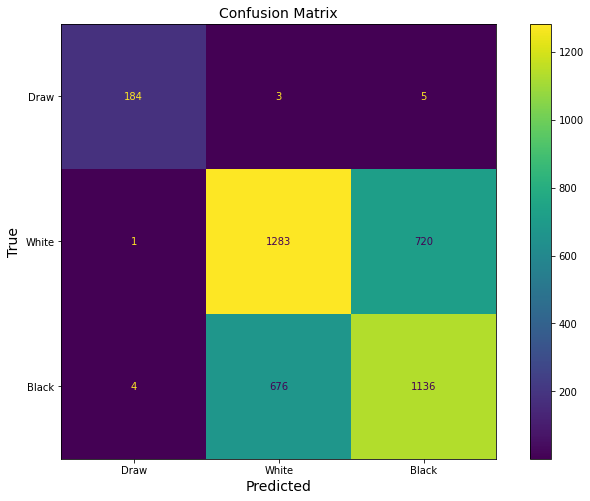

In [157]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_neur_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [158]:
param_grid_neur = {
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['lbfgs', 'sgd']
}

neur_grid_search = GridSearchCV(neur_pipe, param_grid_neur, cv=5, n_jobs=-1)
tuned_neur_pipe = neur_grid_search.fit(X_train, y_train)

best_params_neur_pipe = tuned_neur_pipe.best_params_
print(f'Best Hyperparameters: {best_params_neur_pipe}')

Best Hyperparameters: {'classifier__activation': 'tanh', 'classifier__solver': 'sgd'}


In [159]:
y_pred_tuned_pipe_neur = tuned_neur_pipe.predict(X_test)

conf_matrix_tuned_pipe_neur = confusion_matrix(y_pred_tuned_pipe_neur, y_test)

accuracy_tuned_neur_pipe = accuracy_score(y_pred_tuned_pipe_neur, y_test)
print(f"Accuracy: {accuracy_tuned_neur_pipe}")

Accuracy: 0.6679960119641076


### Classification report

In [160]:
report_neur_tuned = classification_report(y_test, y_pred_tuned_pipe_neur, output_dict=True)

df_classification_report = pd.DataFrame(report_neur_tuned).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              1.000000  0.942708  0.970509    192.0
1              0.658605  0.706587  0.681753   2004.0
2              0.644259  0.596366  0.619388   1816.0
macro avg      0.767621  0.748554  0.757217   4012.0
weighted avg   0.668449  0.667996  0.667343   4012.0


### Confusion matrix

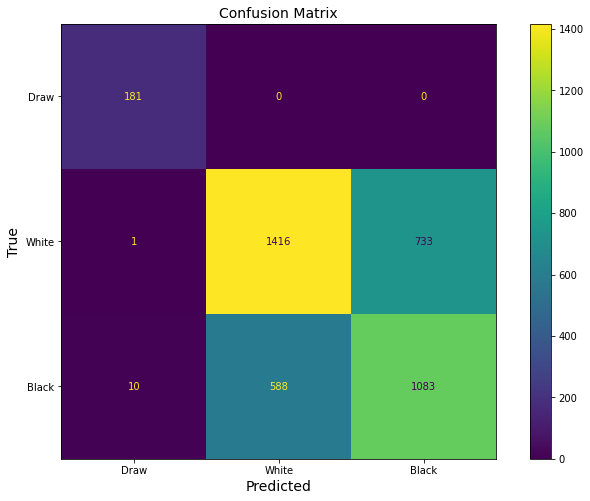

In [161]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_neur,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

## Naive bayes

In [46]:
nb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_pipe.fit(X_train, y_train)

#predict
y_pred_nb_pipeline = nb_pipe.predict(X_test)

#conf_matrix
conf_matrix_nb_pipeline = confusion_matrix(y_test, y_pred_nb_pipeline)

#accuracy
accuracy_nb_pipeline = accuracy_score(y_pred_nb_pipeline, y_test)
print(f"Accuracy: {accuracy_nb_pipeline}")

Accuracy: 0.4992522432701894


### Classification report

In [175]:
report_nb = classification_report(y_test, y_pred_nb_pipeline, output_dict=True)

df_classification_report = pd.DataFrame(report_nb).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.461929  0.947917  0.621160    192.0
1              0.612450  0.152196  0.243805   2004.0
2              0.485897  0.834802  0.614263   1816.0
macro avg      0.520092  0.644971  0.493076   4012.0
weighted avg   0.547963  0.499252  0.429549   4012.0


### Confusion matrix

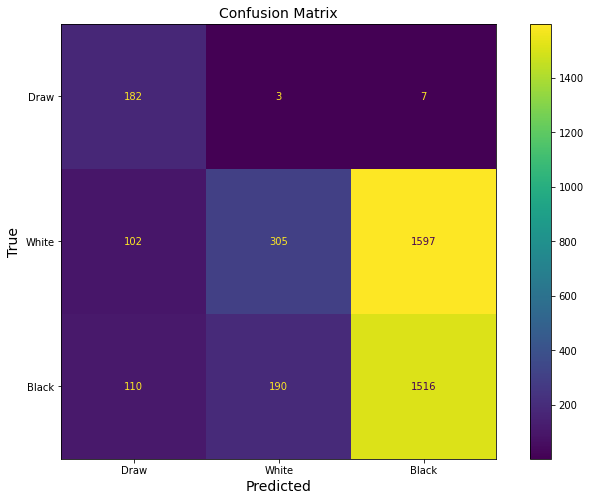

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb_pipeline,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

### Tuning

In [49]:
param_grid_nb = {
    'classifier__var_smoothing': np.logspace(0,-25, num=100)
}

nb_grid_search = GridSearchCV(nb_pipe, param_grid_nb, cv=5, n_jobs=-1)
tuned_nb_pipe = nb_grid_search.fit(X_train, y_train)

best_params_nb_pipe = tuned_nb_pipe.best_params_
print(f'Best Hyperparameters: {best_params_nb_pipe}')

Best Hyperparameters: {'classifier__var_smoothing': 0.17475284000076838}


In [50]:
y_pred_tuned_pipe_nb = tuned_nb_pipe.predict(X_test)

conf_matrix_tuned_pipe_nb = confusion_matrix(y_pred_tuned_pipe_nb, y_test)

accuracy_tuned_nb_pipe = accuracy_score(y_pred_tuned_pipe_nb, y_test)
print(f"Accuracy: {accuracy_tuned_nb_pipe}")

Accuracy: 0.6577766699900299


### Classification report

In [176]:
report_nb_tuned = classification_report(y_test, y_pred_tuned_pipe_nb, output_dict=True)

df_classification_report = pd.DataFrame(report_nb_tuned).transpose()
df_classification_report = df_classification_report.drop('accuracy', axis=0, errors='ignore')

print(df_classification_report)

              precision    recall  f1-score  support
0              0.989189  0.953125  0.970822    192.0
1              0.631299  0.768962  0.693363   2004.0
2              0.660173  0.503855  0.571518   1816.0
macro avg      0.760220  0.741981  0.745234   4012.0
weighted avg   0.661496  0.657777  0.651489   4012.0


### Confusion matrix

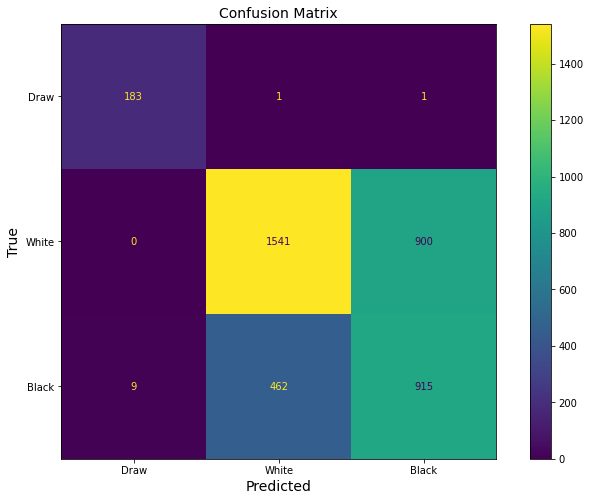

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tuned_pipe_nb,
                               display_labels=class_labels)
disp.plot(ax = ax)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('True', fontsize = 14)
plt.show()

## Accuracy assesment

In [162]:
classifiers = ['Classification Tree', 'Random forest', 'Logistic Regression',
               'k-NN', 'SVM', 'Neural network', 'Naive Bayes']

accuracies_before_tuning = [accuracy_ctree_pipeline, accuracy_rf_pipeline, accuracy_lr_pipeline, 
              accuracy_knn_pipeline, accuracy_svm_pipeline, accuracy_neur_pipeline, accuracy_nb_pipeline]

accuracies_after_tuning = [accuracy_tuned_class_tree_pipe, accuracy_tuned_rf_pipe, accuracy_tuned_lr_pipe, 
              accuracy_tuned_knn_pipe, accuracy_tuned_svm_pipe, accuracy_tuned_neur_pipe, accuracy_tuned_nb_pipe]

In [250]:
accuracy_df = pd.DataFrame({
    'Classifier': classifiers,
    'Accuracy': accuracies_before_tuning,
    'Accuracy after tuning': accuracies_after_tuning
})

In [251]:
accuracy_df

,Classifier,Accuracy,Accuracy after tuning
0,Classification Tree,0.656032,0.663260
1,Random forest,0.687438,0.692921
2,Logistic Regression,0.666750,0.670239
3,k-NN,0.621137,0.630110
4,SVM,0.670489,0.670489
5,Neural network,0.648804,0.667996
6,Naive Bayes,0.499252,0.657777
